In [1]:
from pyabc import History
import pandas as pd
from ionchannelABC.utils import weighted_cv
from pyabc.weighted_statistics import weighted_mean
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

INFO:myokit:Loading Myokit version 1.28.3
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:290: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:306: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:290: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:306: SyntaxWarning: assertion is always true, perhaps remove parentheses?


### Load history files

In [12]:
store_path = '/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/'

In [13]:
h_nyg_r_reported = History('sqlite:///'+store_path+
                         'nygren/isus/reported/nygren_isus_rgate_reported.db')
h_nyg_s_reported = History('sqlite:///'+store_path+
                         'nygren/isus/reported/nygren_isus_sgate_reported.db')

In [14]:
h_nyg_r = History('sqlite:///'+store_path+
                         'nygren/isus/full/nygren_isus_rgate_full.db')
h_nyg_s = History('sqlite:///'+store_path+
                         'nygren/isus/full/nygren_isus_sgate_full.db')

In [15]:
h_cou_a_reported = History('sqlite:///'+store_path+
                         'courtemanche/isus/reported/courtemanche_isus_agate_reported.db')
h_cou_i_reported = History('sqlite:///'+store_path+
                         'courtemanche/isus/reported/courtemanche_isus_igate_reported.db')

In [16]:
h_cou_a = History('sqlite:///'+store_path+
                  'courtemanche/isus/full/courtemanche_isus_agate_full.db')
h_cou_i = History('sqlite:///'+store_path+
                  'courtemanche/isus/full/courtemanche_isus_igate_full.db')

In [18]:
h_sta = History('sqlite:///'+store_path+
                'standardised/isus/standardised_isus.db')

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/e3q8)

## Load databases and weightings

### NYG

In [19]:
df_nyg_reported_r, w_nyg_reported_r = h_nyg_r_reported.get_distribution(m=0)
df_nyg_reported_s, w_nyg_reported_s = h_nyg_s_reported.get_distribution(m=0)

In [20]:
df_nyg_r, w_nyg_r = h_nyg_r.get_distribution(m=0)
df_nyg_s, w_nyg_s = h_nyg_s.get_distribution(m=0)

### COU

In [36]:
df_cou_reported_a, w_cou_reported_a = h_cou_a_reported.get_distribution(m=0)
df_cou_reported_i, w_cou_reported_i = h_cou_i_reported.get_distribution(m=0)

In [37]:
df_cou_a, w_cou_a = h_cou_a.get_distribution(m=0)
df_cou_i, w_cou_i = h_cou_i.get_distribution(m=0)

### STA

In [10]:
df_sta, w_sta = h_sta.get_distribution(m=0)

## Compare number of parameters

In [23]:
data = [['N',6,7],['C',13,7],['S',4,4]]

In [24]:
df = pd.DataFrame(data, columns = ['model', 'act', 'inact'])

In [25]:
df.inact = df.act+df.inact

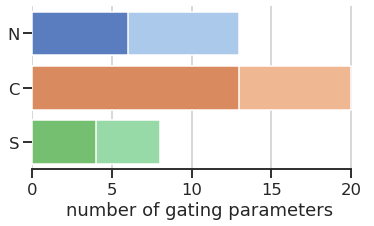

In [26]:
sns.set(style="ticks")
sns.set_context('talk')
sns.set_color_codes("pastel")

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="inact", y="model", hue="model", data=df,
            palette="pastel", dodge=False)
            #label="inact", color="b")

sns.set_color_codes("muted")
sns.barplot(x="act", y="model", hue="model", data=df,
            palette="muted", dodge=False)
            #label="act", color="r")

handles, labels = ax.get_legend_handles_labels()
order = []
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          ncol=2, loc="lower right", frameon=False)
ax.set(xlabel="number of gating parameters")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [27]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/param_num_compare.pdf')

### Compare original and full datasets

In [38]:
cv_nyg_reported_r = weighted_cv(df_nyg_reported_r, w_nyg_reported_r, sample_size=len(df_nyg_reported_r))
cv_nyg_reported_s = weighted_cv(df_nyg_reported_s, w_nyg_reported_s, sample_size=len(df_nyg_reported_s))

cv_nyg_reported = pd.concat([cv_nyg_reported_r, cv_nyg_reported_s])
model = ['N',]*len(cv_nyg_reported)
data = ['ORIGINAL',]*len(cv_nyg_reported)
frame = {'model': model, 'data': data, 'CV': cv_nyg_reported}
nyg_reported = pd.DataFrame(frame)

In [39]:
cv_nyg_r = weighted_cv(df_nyg_r, w_nyg_r, sample_size=len(df_nyg_r))
cv_nyg_s = weighted_cv(df_nyg_s, w_nyg_s, sample_size=len(df_nyg_s))

cv_nyg = pd.concat([cv_nyg_r, cv_nyg_s])
model = ['N',]*len(cv_nyg)
data = ['COMPLETE',]*len(cv_nyg)
frame = {'model': model, 'data': data, 'CV': cv_nyg}
nyg = pd.DataFrame(frame)

In [47]:
cv_cou_a_reported = weighted_cv(df_cou_reported_a, w_cou_reported_a, sample_size=len(df_cou_reported_a))
cv_cou_i_reported = weighted_cv(df_cou_reported_i, w_cou_reported_i, sample_size=len(df_cou_reported_i))

cv_cou_reported = pd.concat([cv_cou_a_reported, cv_cou_i_reported])
model = ['C',]*len(cv_cou_reported)
data = ['ORIGINAL',]*len(cv_cou_reported)
frame = {'model': model, 'data': data, 'CV': cv_cou_reported}
cou_reported = pd.DataFrame(frame)

In [48]:
cv_cou_a = weighted_cv(df_cou_a, w_cou_a, sample_size=len(df_cou_a))
cv_cou_i = weighted_cv(df_cou_i, w_cou_i, sample_size=len(df_cou_i))

cv_cou = pd.concat([cv_cou_a, cv_cou_i])
model = ['C',]*len(cv_cou)
data = ['COMPLETE',]*len(cv_cou)
frame = {'model': model, 'data': data, 'CV': cv_cou}
cou = pd.DataFrame(frame)

In [49]:
compare_reported_full = pd.concat([cou_reported, cou])

(array([0, 1]), <a list of 2 Text xticklabel objects>)

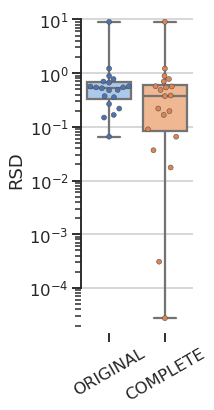

In [50]:
sns.set(style="ticks")
sns.set_context('talk')
sns.set_color_codes('pastel')

# Initialize the figure
f, ax = plt.subplots(figsize=(2, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='data', y='CV', data=compare_reported_full,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='data', y='CV', data=compare_reported_full,
              dodge=True, linewidth=0.5
            )

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="RSD")
ax.set_yscale('log')
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = compare_reported_full['CV'].max() + 0.02, 0.02, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p = 0.26", ha='center', va='bottom', color=col)

plt.xticks(rotation=30)

In [51]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/cou_add_data.pdf')

In [54]:
diff = nyg.CV-nyg_reported.CV
ss.wilcoxon(diff)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=1.0, pvalue=0.046399461870904594)

In [55]:
diff = cou.CV-cou_reported.CV
ss.wilcoxon(diff)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=2.0, pvalue=0.04252247799805163)

In [56]:
nyg_pars_reported_r = df_nyg_reported_r.sample(n=100, weights=w_nyg_reported_r, replace=True)
nyg_pars_reported_r = nyg_pars_reported_r.set_index([pd.Index(range(100))])
nyg_pars_reported_s = df_nyg_reported_s.sample(n=100, weights=w_nyg_reported_s, replace=True)
nyg_pars_reported_s = nyg_pars_reported_s.set_index([pd.Index(range(100))])

nyg_pars_reported = pd.concat([nyg_pars_reported_r, nyg_pars_reported_s],axis=1).to_dict(orient='records')

In [57]:
N = 100
nyg_pars_r = df_nyg_r.sample(n=N, weights=w_nyg_r, replace=True)
nyg_pars_r = nyg_pars_r.set_index([pd.Index(range(N))])
nyg_pars_s = df_nyg_s.sample(n=N, weights=w_nyg_s, replace=True)
nyg_pars_s = nyg_pars_s.set_index([pd.Index(range(N))])
nyg_pars = pd.concat([nyg_pars_r, nyg_pars_s],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


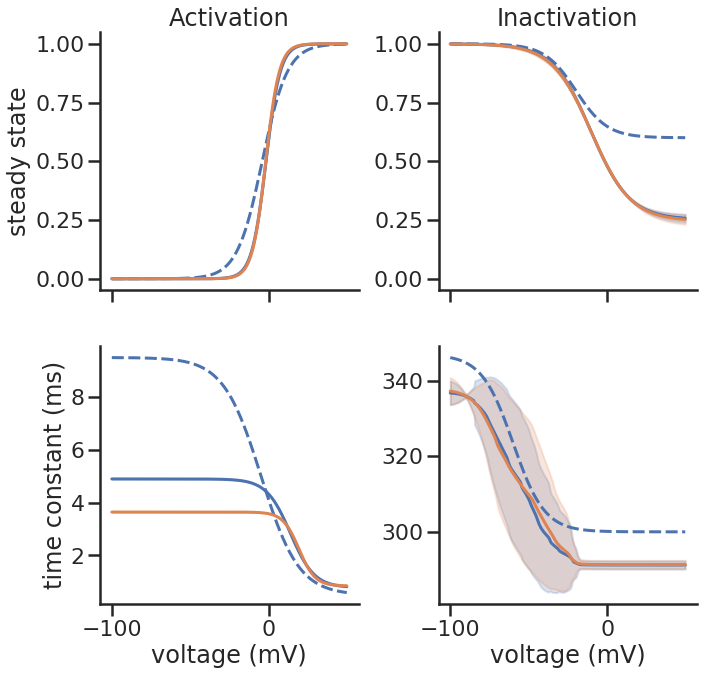

In [58]:
from ionchannelABC.visualization import plot_variables
sns.set_context('poster')
sns.set_palette('deep')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

v = np.arange(-100, 50, 0.5)

nyg_vars = {'ri': 'isus.r_inf',
            'si': 'isus.s_inf',
            'rt': 'isus.tau_r',
            'st': 'isus.tau_s'}

f, ax = plot_variables(v, [nyg_vars, nyg_vars], 
                       ['models/nygren_isus.mmt', 'models/nygren_isus_full.mmt'], 
                       [nyg_pars_reported, nyg_pars],
                       original=[True,False],
                       figshape=(2,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))
    
#lim=200
#ax[1][0].set_ylim((-0.05*lim, 1.05*lim))
#lim=2000
#ax[1][1].set_ylim((-0.05*lim, 1.05*lim))
#lim=2000
#ax[1][2].set_ylim((-0.05*lim, 1.05*lim))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [59]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/nyg_add_data_gates.pdf')

In [60]:
cou_pars_reported_a = df_cou_reported_a.sample(n=100, weights=w_cou_reported_a, replace=True)
cou_pars_reported_a = cou_pars_reported_a.set_index([pd.Index(range(100))])
cou_pars_reported_i = df_cou_reported_i.sample(n=100, weights=w_cou_reported_i, replace=True)
cou_pars_reported_i = cou_pars_reported_i.set_index([pd.Index(range(100))])

cou_pars_reported = pd.concat([cou_pars_reported_a, cou_pars_reported_i],axis=1).to_dict(orient='records')

In [61]:
N = 100
cou_pars_a = df_cou_a.sample(n=N, weights=w_cou_a, replace=True)
cou_pars_a = cou_pars_a.set_index([pd.Index(range(N))])
cou_pars_i = df_cou_i.sample(n=N, weights=w_cou_i, replace=True)
cou_pars_i = cou_pars_i.set_index([pd.Index(range(N))])
cou_pars = pd.concat([cou_pars_a, cou_pars_i],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


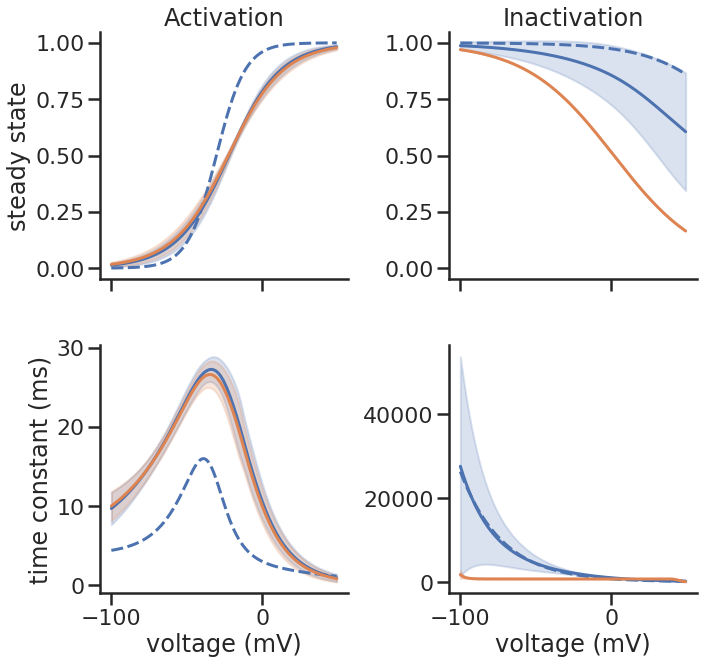

In [62]:
from ionchannelABC.visualization import plot_variables
sns.set_context('poster')
sns.set_palette('deep')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

v = np.arange(-100, 50, 0.5)

cou_vars = {'ri': 'isus.a_inf',
            'si': 'isus.i_inf',
            'rt': 'isus.tau_a',
            'st': 'isus.tau_i'}

f, ax = plot_variables(v, [cou_vars, cou_vars], 
                       ['models/courtemanche_isus.mmt', 'models/courtemanche_isus_full.mmt'], 
                       [cou_pars_reported, cou_pars],
                       original=[True,False],
                       figshape=(2,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))
    
#lim=200
#ax[1][0].set_ylim((-0.05*lim, 1.05*lim))
#lim=2000
#ax[1][1].set_ylim((-0.05*lim, 1.05*lim))
#lim=2000
#ax[1][2].set_ylim((-0.05*lim, 1.05*lim))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [63]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/cou_add_data_gates.pdf')

In [64]:
df_reported = pd.concat([nyg_reported, cou_reported])

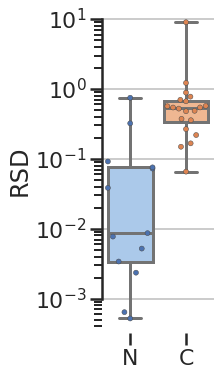

In [65]:
sns.set(style="ticks")
sns.set_context('poster')

# Initialize the figure
f, ax = plt.subplots(figsize=(2, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='model', y='CV', data=df_reported,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='model', y='CV', data=df_reported,
              linewidth=0.5)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="RSD")
ax.set_yscale('log')
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = df_reported['CV'].max() + 0.1, 0.1, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p = 0.29", ha='center', va='bottom', color=col)

In [66]:
ss.mannwhitneyu(df_reported[df_reported.model=='N'].CV, df_reported[df_reported.model=='C'].CV)

MannwhitneyuResult(statistic=24.0, pvalue=5.074087068793138e-05)

In [67]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/isus/cv_original.pdf')

## Standardised model

In [20]:
cv_sta = weighted_cv(df_sta, w_sta, sample_size=len(df_sta))

In [21]:
model = ['S',]*len(cv_sta)
frame = {'model': model, 'CV': cv_sta}
sta = pd.DataFrame(frame)

In [22]:
df = pd.concat([nyg, cou, sta])

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


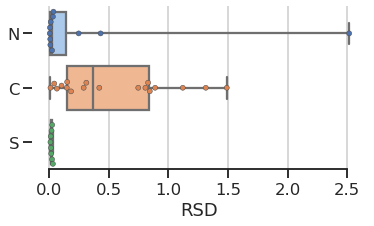

In [23]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(6,3))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='CV', y='model', data=df,
            palette="pastel", whis="range")

# Add in points to show each observation
sns.swarmplot(x='CV', y='model', data=df,
              linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(xlabel="RSD")
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [24]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ito/compare_cv_full.pdf')

In [25]:
ss.mannwhitneyu(df[df.model=='N'].CV, df[df.model=='S'].CV)

MannwhitneyuResult(statistic=40.0, pvalue=0.3862895453617557)

In [26]:
ss.mannwhitneyu(df[df.model=='C'].CV, df[df.model=='S'].CV)

MannwhitneyuResult(statistic=7.0, pvalue=0.00016961862465061854)

In [27]:
ss.mannwhitneyu(df[df.model=='N'].CV, df[df.model=='C'].CV)

MannwhitneyuResult(statistic=39.0, pvalue=0.0037439797621356898)

### Plot epsilon comparison

In [28]:
eps_nyg = h_nyg.get_weighted_distances()
eps_nyg = eps_nyg.sample(n=2000,axis=0,weights=eps_nyg.w,replace=True).distance
eps_nyg = pd.DataFrame({'model': 'N', 'distance': eps_nyg})

In [29]:
eps_cou_a = h_cou_a.get_weighted_distances()
eps_cou_i = h_cou_i.get_weighted_distances()

In [30]:
# Create virtual COU epsilon dataset by summing
eps_cou = np.array([])
eps_cou = (np.array(eps_cou_a.sample(n=2000,axis=0,weights=eps_cou_a.w,replace=True).distance) +
           np.array(eps_cou_i.sample(n=2000,axis=0,weights=eps_cou_i.w,replace=True).distance))

In [31]:
eps_cou = pd.DataFrame({'model': 'C', 'distance': eps_cou})

In [32]:
eps_sta = h_sta.get_weighted_distances()

In [33]:
eps_sta = eps_sta.sample(n=2000,axis=0,weights=eps_sta.w,replace=True).distance
eps_sta = pd.DataFrame({'model': 'S', 'distance': eps_sta})

In [34]:
eps = pd.concat([eps_nyg,eps_cou,eps_sta])

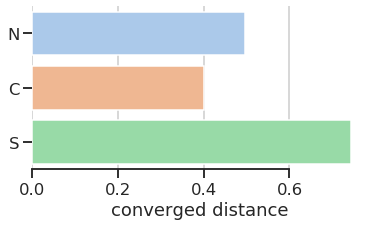

In [35]:
sns.set_context('talk')

f, ax = plt.subplots(figsize=(6,3))

sns.barplot(x="distance", y="model", data=eps, palette='pastel')

ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="converged distance")
sns.despine(trim=True, left=True)

In [36]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ito/eps_compare.pdf')

## Plot simulation outputs

In [37]:
from ionchannelABC.visualization import plot_sim_results

In [38]:
from experiments.ito_wang import (wang_act,
                                    wang_inact)
from experiments.ito_courtemanche import (courtemanche_act_kin,
                                          courtemanche_inact_kin,
                                            courtemanche_deact,
                                            courtemanche_rec)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/ionchannelABC-0.2.0-py3.7.egg/ionchannelABC/visualization.py:137: RuntimeWarning: invalid value encountered in true_divide


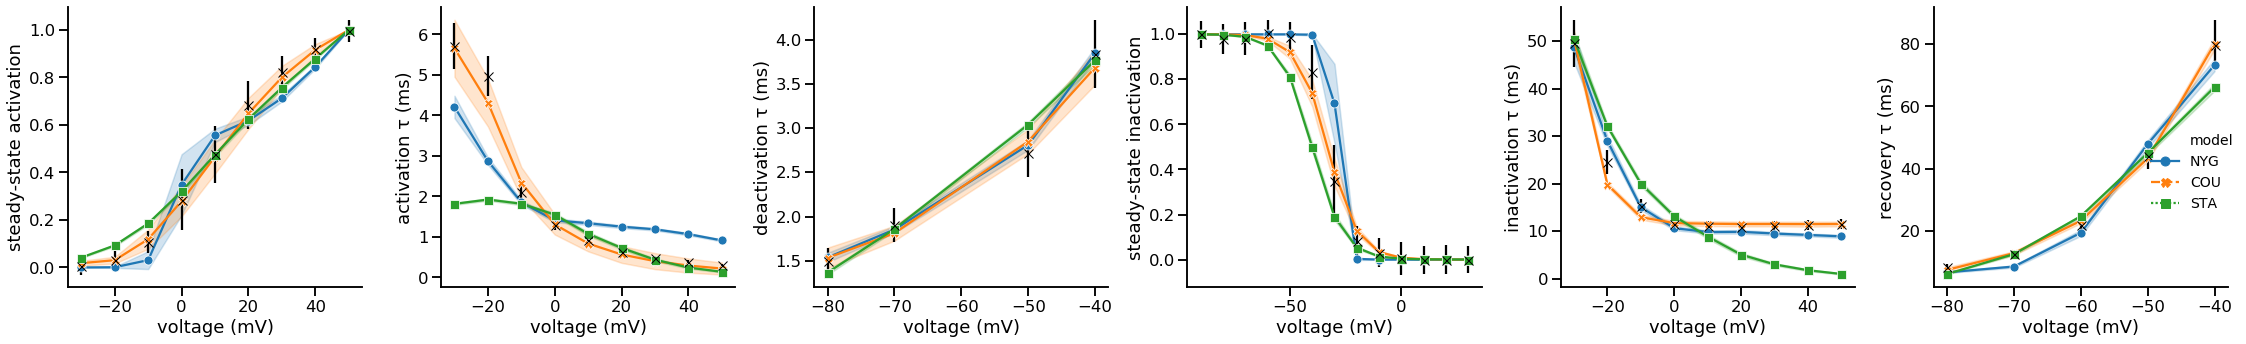

In [14]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = plot_sim_results(['models/nygren_ito.mmt',
                      'models/courtemanche_ito.mmt',
                      'models/courtemanche_ito.mmt',
                      'models/standardised_ito.mmt'],
                     wang_act,
                     courtemanche_act_kin,
                     courtemanche_deact,
                     wang_inact,
                     courtemanche_inact_kin,
                     courtemanche_rec,
                     temp_match_model = 3,
                     masks=[None,
                            [0,1,2]+[None,]*3,
                            [None,]*3+[3,4,5],
                            None],
                     df=[df_nyg,
                         df_cou_a,
                         df_cou_i,
                         df_sta], 
                     w=[w_nyg,
                        w_cou_a,
                        w_cou_i,
                        w_sta])

ylabels = ["steady-state activation", "activation τ (ms)", "deactivation τ (ms)", "steady-state inactivation",
           "inactivation τ (ms)", "recovery τ (ms)"]
#titles = ["Steady-state activation", "Activation time constant", "Deactivation time constant",
#          "Steady-state inactivation",
#          "Inactivation time constant", "Recovery time constant"]
for ax in g.axes.flatten():
    ax.set_xlabel("voltage (mV)")
for ax, yl in zip(g.axes.flatten(), ylabels):
    ax.set_ylabel(yl)
for ax in g.axes.flatten():
    ax.set_title("")

plt.tight_layout()

In [15]:
g.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ito/compare_out.pdf')

### Compare SS and tau values

In [40]:
import myokit
nyg = 'models/nygren_ito_adj.mmt'
cou ='models/courtemanche_ito_adj.mmt'
std = 'models/standardised_ito.mmt'

In [41]:
v = np.arange(-80, 50, 0.5)

In [42]:
nyg_vars = {'ri': 'ito.r_inf',
            'si': 'ito.s_inf',
            'rt': 'ito.tau_r',
            'st': 'ito.tau_s'}

In [43]:
cou_vars = {'ri': 'ito.a_inf',
            'si': 'ito.i_inf',
            'rt': 'ito.tau_a',
            'st': 'ito.tau_i'}

In [44]:
from ionchannelABC.visualization import plot_variables

In [45]:
nyg_pars_reported = df_nyg_reported.sample(n=100, weights=w_nyg_reported, replace=True)
nyg_pars_reported = nyg_pars_reported.set_index([pd.Index(range(100))])
nyg_pars_reported = nyg_pars_reported.to_dict(orient='records')

In [46]:
cou_pars_a = df_cou_a.sample(n=100, weights=w_cou_a, replace=True)
cou_pars_a = cou_pars_a.set_index([pd.Index(range(100))])
cou_pars_i = df_cou_i.sample(n=100, weights=w_cou_i, replace=True)
cou_pars_i = cou_pars_i.set_index([pd.Index(range(100))])
cou_pars = pd.concat([cou_pars_a,cou_pars_i],axis=1).to_dict(orient='records')

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


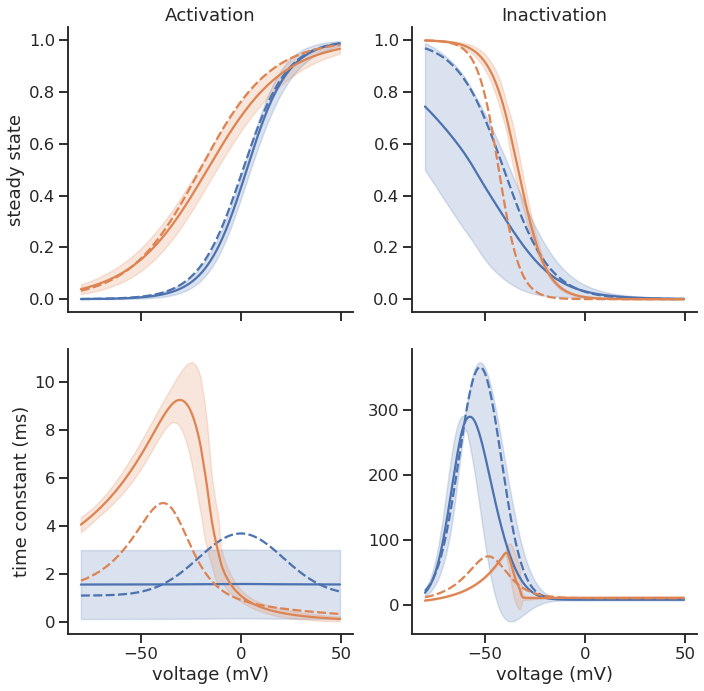

In [47]:
sns.set_context('talk')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_vars, cou_vars], 
                       [nyg, cou], 
                       [nyg_pars_reported, cou_pars],
                       original=[True,True,False],
                       figshape=(2,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
    
plt.tight_layout()

In [33]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ito/original_ss_tau.pdf')

In [48]:
std_vars = {'ri': 'ito.r_ss',
            'si': 'ito.s_ss',
            'rt': 'ito.tau_r',
            'st': 'ito.tau_s'}

In [49]:
N = 100

nyg_pars = df_nyg.sample(n=N, weights=w_nyg, replace=True)
nyg_pars = nyg_pars.set_index([pd.Index(range(N))])
nyg_pars = nyg_pars.to_dict(orient='records')

cou_pars_a = df_cou_a.sample(n=100, weights=w_cou_a, replace=True)
cou_pars_a = cou_pars_a.set_index([pd.Index(range(100))])
cou_pars_i = df_cou_i.sample(n=100, weights=w_cou_i, replace=True)
cou_pars_i = cou_pars_i.set_index([pd.Index(range(100))])
cou_pars = pd.concat([cou_pars_a,cou_pars_i],axis=1).to_dict(orient='records')

std_pars = df_sta.sample(n=N, weights=w_sta, replace=True)
std_pars = std_pars.set_index([pd.Index(range(N))])
std_pars = std_pars.to_dict(orient='records')

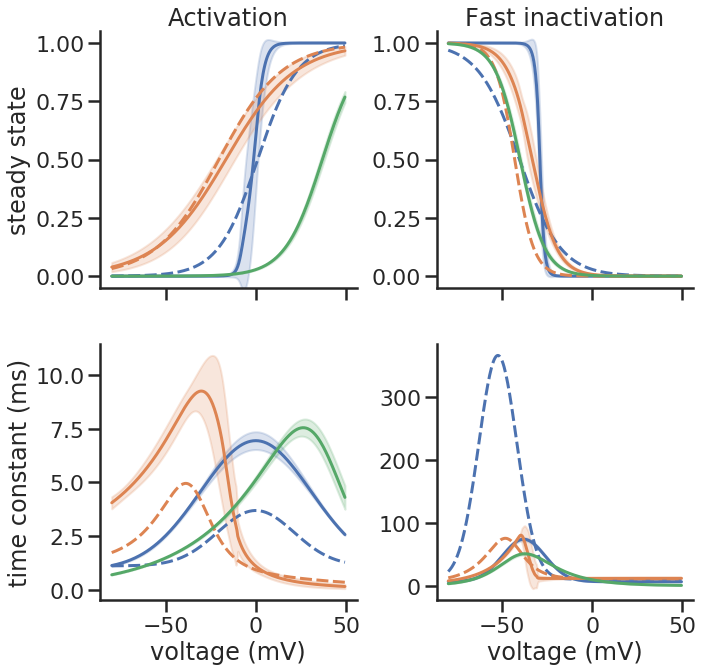

In [50]:
sns.set_context('poster')
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

f, ax = plot_variables(v, [nyg_vars, cou_vars, std_vars], 
                       [nyg, cou, std], 
                       [nyg_pars, cou_pars, std_pars],
                       original=[True,True,False],
                       figshape=(2,2))

ax[0][0].set_ylabel('steady state')
for a in ax[0][1:]:
    a.set_ylabel('')
ax[0][0].set_title('Activation')
ax[0][1].set_title('Fast inactivation')

for a in ax[0][:]:
    a.set_ylim((-0.05, 1.05))

ax[1][0].set_ylabel('time constant (ms)')
for a in ax[1][1:]:
    a.set_ylabel('')
    
for a in ax[1][:]:
    a.set_xlabel('voltage (mV)')
    
for a in ax.flatten():
    x0,x1 = a.get_xlim()
    y0,y1 = a.get_ylim()
    a.set_aspect(abs(x1-x0)/abs(y1-y0))
    
plt.tight_layout()

In [51]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ito/compare_gates.pdf')

### Compare final pulse after pulse train

In [52]:
import myokit

In [53]:
nsteps = 100
period = 1000
tstep = 100
vhold = -50
vstep = -10

pulsetrain = myokit.pacing.steptrain([vstep,]*nsteps,
                                     vhold,
                                     period-tstep,
                                     tstep)

In [54]:
# nygren_ina_full has had tau values adjusted for temperature to 310K
models = [myokit.load_model(modelfile) for modelfile in ['models/nygren_ito_adj.mmt',
                                                         'models/courtemanche_ito_adj.mmt',
                                                         'models/standardised_ito.mmt']]
for m in models:
    pace = m.get('membrane.V')
    if pace.binding() != 'pace':
        if pace.is_state():
            pace.demote()
        pace.set_rhs(0)
        pace.set_binding('pace')

In [55]:
sims = [myokit.Simulation(m, pulsetrain) for m in models]

In [56]:
par_samples = [nyg_pars, cou_pars, std_pars]

In [ ]:
import time

all_samples = pd.DataFrame({})
for i, s in enumerate(sims):
    s.reset()
    # store original
    if models[i].name() != 'STA':
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['ito.g','engine.time','membrane.V'],
                        log_interval=1)
        datalog = datalog.trim((nsteps)*period-tstep-20, (nsteps)*period, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['ito.g']/max(datalog['ito.g']),
              'sample': 0,
              'model': models[i].name(),
              'type': 'original'}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)
    
    # re-calibrated
    for j, par_sample in enumerate(par_samples[i]):
        s.reset()
        for p, v in par_sample.items():
            name = p
            value = v
            if p.startswith("log"):
                name = p[4:]
                value = 10**v
            s.set_constant(name, value)
            
        # Log run time for comparisons
        t0 = time.time()
        datalog = s.run(pulsetrain.characteristic_time(),
                        log=['ito.g','engine.time','membrane.V'],
                        log_interval=1)
        t1 = time.time()
        dt = t1-t0
        
        datalog = datalog.trim((nsteps)*period-tstep-20, (nsteps)*period, adjust=True)
        df = {'time': datalog['engine.time'],
              'gate': datalog.npview()['ito.g']/max(datalog['ito.g']),
              'sample': j,
              'model': models[i].name(),
              'type': 'recalibrated',
              'runtime': dt}
        df = pd.DataFrame(df)
        all_samples = all_samples.append(df, ignore_index=True)

/scratch/cph211/miniconda3/envs/ionchannelABC/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [44]:
recalibrated_df = all_samples[all_samples['type']=='recalibrated']

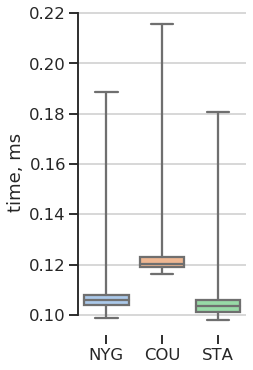

In [45]:
sns.set(style="ticks")
sns.set_context('talk')

# Initialize the figure
f, ax = plt.subplots(figsize=(3, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x='model', y='runtime', data=recalibrated_df,
            palette="pastel", whis="range")

# Add in points to show each observation
#sns.swarmplot(x='model', y='runtime', data=recalibrated_df,
#              linewidth=0.5)

# Tweak the visual presentation
ax.yaxis.grid(True)
ax.set(ylabel="time, ms")
ax.set(xlabel="")
sns.despine(trim=True, bottom=True)

# statistical annotation
#x1, x2 = 0, 1   # columns
#y, h, col = recalibrated_df['runtime'].max() + 0.01, 0.01, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "p < 0.001", ha='center', va='bottom', color=col)

In [46]:
f.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ito/runtime_compare.pdf')

In [47]:
all_samples_detail = all_samples[(all_samples['time']>=19) & (all_samples['time'] < 30)]

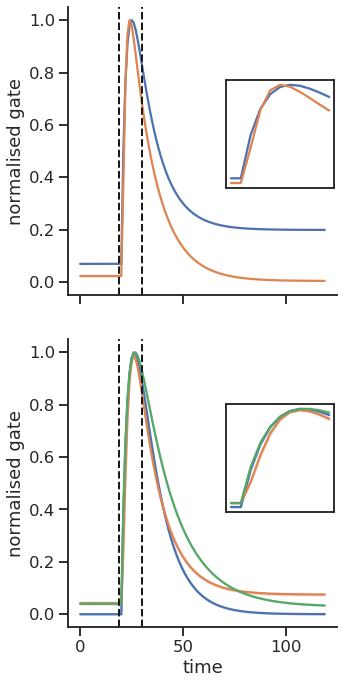

In [48]:
sns.set_context('talk')

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

g = sns.relplot(x='time', y='gate', hue='model', row='type', 
                kind='line', data=all_samples,
                legend=False, height=5, aspect=1)

ax2 = plt.axes([.65, .7, .3, .15])
sns.lineplot(x='time',y='gate',hue='model',
             data=all_samples_detail[all_samples_detail['type']=='original'], ax=ax2,
             legend=False)
plt.setp(ax2, xticks=[], yticks=[])
ax2.set_xlabel('')
ax2.set_ylabel('')

ax3 = plt.axes([.65, .25, .3, .15])
sns.lineplot(x='time',y='gate',hue='model',
             data=all_samples_detail[all_samples_detail['type']=='recalibrated'], ax=ax3,
             legend=False)
plt.setp(ax3, xticks=[], yticks=[])
ax3.set_xlabel('')
ax3.set_ylabel('')

for a in g.axes.flatten():
    a.set_ylabel('normalised gate')
    a.set_title('')
    a.axvline(x=19, linestyle='--', color='k', linewidth=2)
    a.axvline(x=30, linestyle='--', color='k', linewidth=2)

In [49]:
g.savefig('/storage/hhecm/cellrotor/chouston/abc-human-atrial-results/paper-figures/ito/trace_compare_out.pdf')